In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.DataFrame.from_csv('train.csv', index_col=None)
train_df.head()

,rating,movieId,userId
0,3.0,2158,10953099004185006703
1,3.5,12959,10953099004185006703
2,3.5,7808,10953099004185006703
3,4.0,9049,4762492897681260571
4,3.0,12363,2110017552365950661


In [3]:
test_df = pd.DataFrame.from_csv('test.csv', index_col=None)
test_df.head()

,movieId,userId
0,939,3128775406573976678
1,19,6058877902987009152
2,1213,2787275058272728238
3,1141,14199414671932452776
4,2935,5958052843391945803


In [4]:
print np.max(train_df.rating), np.min(train_df.rating)

5.0 0.5


In [5]:
mean_raiting = np.mean(train_df.rating)
mean_raiting

3.5207268919475605

In [6]:
mean_raiting = np.median(train_df.rating)
mean_raiting

3.5

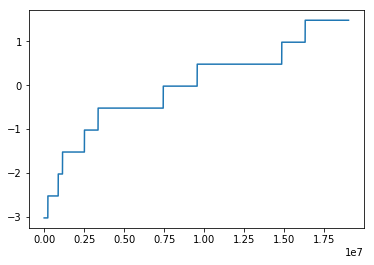

In [28]:
plt.plot(np.sort(train_df.rating))

(array([  227322.,   647274.,   268234.,  1369117.,   853266.,  4070848.,
         2120144.,  5282754.,  1463401.,  2712213.]),
 array([-3.  , -2.55, -2.1 , -1.65, -1.2 , -0.75, -0.3 ,  0.15,  0.6 ,
         1.05,  1.5 ]),
 <a list of 10 Patch objects>)

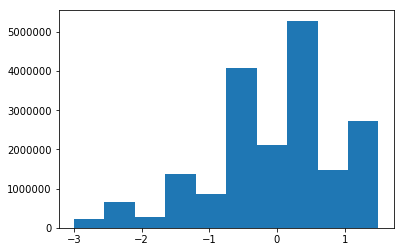

In [17]:
plt.hist(train_df.rating)

In [7]:
train_df.rating = train_df.rating - mean_raiting
print np.max(train_df.rating), np.min(train_df.rating)

1.5 -3.0


In [8]:
train_size = len(train_df)
print train_size

19014573


In [9]:
movies = np.unique(train_df.movieId)
users = np.unique(train_df.userId)
print len(movies)
print len(users)

18345
138493


In [10]:
movies_idx = {mid: ps for ps, mid in enumerate(movies)}
users_idx = {uid: ps for ps, uid in enumerate(users)}

In [11]:
movies_ps = np.array([movies_idx[mid] for mid in train_df.movieId])
users_ps = np.array([users_idx[uid] for uid in train_df.userId])

In [11]:
for mid in test_df.movieId:
    if mid not in train_df.movieId:
        print mid 

In [12]:
import scipy
from scipy import sparse
train_csr = sparse.csr_matrix((train_df.rating, (movies_ps, users_ps)), shape=(len(movies), len(users) + 1))

In [13]:
train_csr

<18345x138494 sparse matrix of type '<type 'numpy.float64'>'
	with 19014573 stored elements in Compressed Sparse Row format>

In [18]:
%%time
from scipy.sparse.linalg import svds
m, s, u = svds(train_csr, k=200)

CPU times: user 6min 39s, sys: 3.58 s, total: 6min 43s
Wall time: 4min 22s


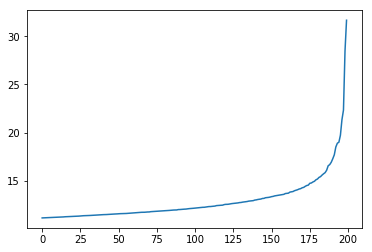

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.sqrt(s))

In [20]:
print m.shape
print u.shape

(18345, 200)
(200, 138494)


In [21]:
res = []
ss = np.sqrt(s)
res_df = pd.DataFrame()
for mid, uid in zip(test_df.movieId, test_df.userId):
    mi = movies_idx[mid]
    ui = len(users)
    if uid in users_idx:
        ui = users_idx[uid]
    val = np.dot(m[mi], s * u[:,ui])
    res.append(val)

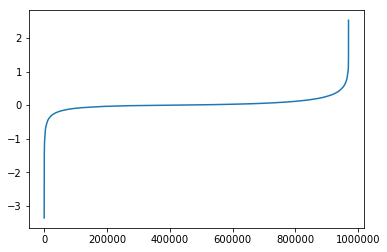

In [22]:
plt.plot(sorted(res))

In [23]:
res_shifted = np.array(res) + mean_raiting

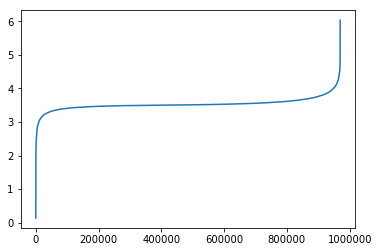

In [24]:
plt.plot(sorted(res_shifted))

In [25]:
res_shifted = np.clip(np.array(res_shifted), 0.0, 5.0)

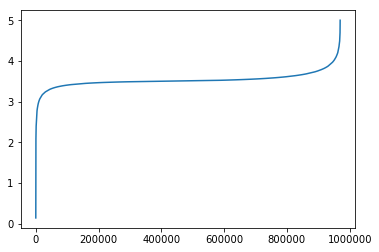

In [26]:
plt.plot(sorted(res_shifted))

(array([  3.00000000e+00,   1.40000000e+01,   7.90000000e+01,
          3.42000000e+02,   1.56300000e+03,   1.01950000e+04,
          6.48263000e+05,   2.90676000e+05,   1.70240000e+04,
          1.29200000e+03]),
 array([ 0.14278166,  0.62850349,  1.11422533,  1.59994716,  2.08566899,
         2.57139083,  3.05711266,  3.5428345 ,  4.02855633,  4.51427817,  5.        ]),
 <a list of 10 Patch objects>)

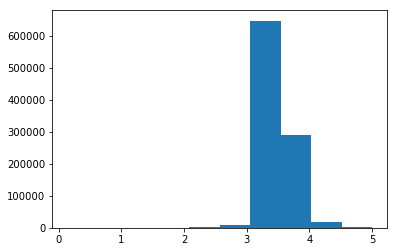

In [27]:
plt.hist(res_shifted)

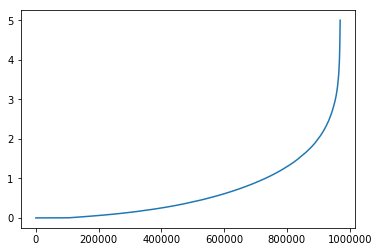

In [55]:
plt.plot(sorted(res))

In [24]:
res_df = pd.DataFrame()
res_df['Id'] = [1 + i for i in range(len(res_shifted))]
res_df['rating'] = res_shifted

In [25]:
res_df.head()

,Id,rating
0,1,3.939785
1,2,3.562538
2,3,3.532932
3,4,3.532623
4,5,3.417430


In [26]:
res_df.to_csv('smb.csv', index=False)